In [19]:
# imports relevant libraries used for building the CNN
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score , recall_score

In [2]:
def recall_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [3]:
def precision_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [4]:
def f1_(y_true, y_pred):
    precision = precision_(y_true, y_pred)
    recall = recall_(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [6]:
"""The function pads all spectrograms to make them uniform 
"""
def padder(list):
    max_check = 0
    for input in list:
        i,j = input.shape
        if max_check < j:
            max_check = j
            
    padded_spectrograms = []
    
    for element in list:
        padded = np.pad(element, [(0,0), (0, max_check - element[0].size)], mode = 'constant', constant_values = 0)
        padded = padded.reshape((padded.shape[0], padded.shape[1], 1))
        padded_spectrograms.append(padded)
        
    padded_spectrograms = np.array(padded_spectrograms)
    
    return padded_spectrograms
            

In [7]:
def data_loader():
    # fetches the current working directory
    path = os.getcwd()

    # stores the path for folder containing spectrogram arrays
    spectrogram_path = os.path.join(path,"train")
    # reads the csv folder containing the annotations
    label_chart = pd.read_csv(os.path.join(path, "annotations.csv"))
    # storing the label strings in one list
    labels = label_chart["fname"]

    # initialises the iteration variable
    iter_variable = 0 
    # initialise variable that will store the list of the spectorgram arrays
    spectrograms = []
    
    # using a for loop to store all spectrogram files corresponding to a particular label
    for label in labels:
        spect = np.load(os.path.join(spectrogram_path, label))
        i,j,k = spect.shape
        spect.resize(j,k)
        mfcc = librosa.feature.mfcc(S = librosa.power_to_db(spect, ref=np.max))
        spectrograms.append(mfcc)
        iter_variable = iter_variable + 1
        
    padded_spectrograms = padder(spectrograms)
    
    # encoding labels as one-hot vectors
    encoding = label_chart['label']
    one_hot_encoder = LabelEncoder()
    encoded = one_hot_encoder.fit_transform(encoding)
    Y = to_categorical(encoded)
        
    # returns padded spectrograms and one-hot encoded labels     
    return padded_spectrograms, Y

In [8]:
X, Y = data_loader()

In [9]:
for a in X:
    print(a.shape)

(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2584, 1)
(20, 2

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [21]:
model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
    
    # first hidden layer
    tf.keras.layers.Dense(1024, activation="relu"),
    
    # second hidden layer
    tf.keras.layers.Dense(512, activation="relu"),
    
    # third hidden layer
    tf.keras.layers.Dense(256, activation="relu"),
    
    # fourth hidden layer
    tf.keras.layers.Dense(128, activation="relu"),
    
    # output layer
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_, precision_, recall_])

    

In [22]:
cp_path = r"C:\Users\Arth Banka\Desktop\Assignment 1\Audio_Classification-MLSP\NN_models"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    cp_path,
    monitor='accuracy',
    mode='max',
    save_best_only=True)



In [23]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=200, verbose = 2, callbacks=[model_checkpoint_callback ])

Epoch 1/200
INFO:tensorflow:Assets written to: C:\Users\Arth Banka\Desktop\Assignment 1\Audio_Classification-MLSP\NN_models\assets
13/13 - 12s - loss: 86.1947 - accuracy: 0.1663 - f1_: 0.1648 - precision_: 0.1663 - recall_: 0.1635 - val_loss: 50.3234 - val_accuracy: 0.1400 - val_f1_: 0.1117 - val_precision_: 0.1142 - val_recall_: 0.1094 - 12s/epoch - 899ms/step
Epoch 2/200
INFO:tensorflow:Assets written to: C:\Users\Arth Banka\Desktop\Assignment 1\Audio_Classification-MLSP\NN_models\assets
13/13 - 8s - loss: 30.9724 - accuracy: 0.2738 - f1_: 0.2719 - precision_: 0.2815 - recall_: 0.2632 - val_loss: 22.1929 - val_accuracy: 0.3100 - val_f1_: 0.2928 - val_precision_: 0.3100 - val_recall_: 0.2773 - 8s/epoch - 625ms/step
Epoch 3/200
INFO:tensorflow:Assets written to: C:\Users\Arth Banka\Desktop\Assignment 1\Audio_Classification-MLSP\NN_models\assets
13/13 - 10s - loss: 14.2641 - accuracy: 0.3950 - f1_: 0.3924 - precision_: 0.4135 - recall_: 0.3738 - val_loss: 16.3265 - val_accuracy: 0.3850 

Epoch 27/200
13/13 - 6s - loss: 0.0065 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.5223 - val_accuracy: 0.7700 - val_f1_: 0.6817 - val_precision_: 0.6962 - val_recall_: 0.6680 - 6s/epoch - 442ms/step
Epoch 28/200
13/13 - 7s - loss: 0.0060 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.5184 - val_accuracy: 0.7750 - val_f1_: 0.6879 - val_precision_: 0.7009 - val_recall_: 0.6758 - 7s/epoch - 551ms/step
Epoch 29/200
13/13 - 7s - loss: 0.0055 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.5223 - val_accuracy: 0.7750 - val_f1_: 0.6879 - val_precision_: 0.7009 - val_recall_: 0.6758 - 7s/epoch - 506ms/step
Epoch 30/200
13/13 - 7s - loss: 0.0051 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.5268 - val_accuracy: 0.7700 - val_f1_: 0.6879 - val_precision_: 0.7009 - val_recall_: 0.6758 - 7s/epoch - 531ms/step
Epoch 31/200
13/13 - 7s - loss: 

Epoch 61/200
13/13 - 5s - loss: 0.0010 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6102 - val_accuracy: 0.7700 - val_f1_: 0.6888 - val_precision_: 0.6983 - val_recall_: 0.6797 - 5s/epoch - 411ms/step
Epoch 62/200
13/13 - 6s - loss: 9.7602e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6146 - val_accuracy: 0.7700 - val_f1_: 0.6888 - val_precision_: 0.6983 - val_recall_: 0.6797 - 6s/epoch - 429ms/step
Epoch 63/200
13/13 - 4s - loss: 9.3706e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6232 - val_accuracy: 0.7700 - val_f1_: 0.6888 - val_precision_: 0.6983 - val_recall_: 0.6797 - 4s/epoch - 340ms/step
Epoch 64/200
13/13 - 5s - loss: 9.0829e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6188 - val_accuracy: 0.7700 - val_f1_: 0.6888 - val_precision_: 0.6983 - val_recall_: 0.6797 - 5s/epoch - 348ms/step
Epoch 65/200
13/13 -

Epoch 95/200
13/13 - 5s - loss: 3.9132e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6912 - val_accuracy: 0.7750 - val_f1_: 0.6858 - val_precision_: 0.6921 - val_recall_: 0.6797 - 5s/epoch - 395ms/step
Epoch 96/200
13/13 - 5s - loss: 3.8296e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6871 - val_accuracy: 0.7750 - val_f1_: 0.6882 - val_precision_: 0.6930 - val_recall_: 0.6836 - 5s/epoch - 394ms/step
Epoch 97/200
13/13 - 5s - loss: 3.7394e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6901 - val_accuracy: 0.7750 - val_f1_: 0.6858 - val_precision_: 0.6921 - val_recall_: 0.6797 - 5s/epoch - 402ms/step
Epoch 98/200
13/13 - 6s - loss: 3.6592e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.6929 - val_accuracy: 0.7750 - val_f1_: 0.6859 - val_precision_: 0.6923 - val_recall_: 0.6797 - 6s/epoch - 435ms/step
Epoch 99/200
13/

Epoch 129/200
13/13 - 5s - loss: 1.8893e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.7648 - val_accuracy: 0.7650 - val_f1_: 0.6779 - val_precision_: 0.6844 - val_recall_: 0.6719 - 5s/epoch - 421ms/step
Epoch 130/200
13/13 - 5s - loss: 1.8571e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.7722 - val_accuracy: 0.7700 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 399ms/step
Epoch 131/200
13/13 - 6s - loss: 1.8254e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.7748 - val_accuracy: 0.7700 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 6s/epoch - 463ms/step
Epoch 132/200
13/13 - 5s - loss: 1.7941e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.7780 - val_accuracy: 0.7700 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 405ms/step
Epoch 133/20

Epoch 163/200
13/13 - 5s - loss: 1.0535e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.8402 - val_accuracy: 0.7650 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 403ms/step
Epoch 164/200
13/13 - 5s - loss: 1.0358e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.8437 - val_accuracy: 0.7650 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 389ms/step
Epoch 165/200
13/13 - 5s - loss: 1.0174e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.8429 - val_accuracy: 0.7700 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 410ms/step
Epoch 166/200
13/13 - 5s - loss: 1.0039e-04 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.8490 - val_accuracy: 0.7650 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 402ms/step
Epoch 167/20

Epoch 197/200
13/13 - 5s - loss: 6.3216e-05 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.9178 - val_accuracy: 0.7650 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 397ms/step
Epoch 198/200
13/13 - 5s - loss: 6.2223e-05 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.9213 - val_accuracy: 0.7650 - val_f1_: 0.6820 - val_precision_: 0.6885 - val_recall_: 0.6758 - 5s/epoch - 397ms/step
Epoch 199/200
13/13 - 5s - loss: 6.1264e-05 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.9298 - val_accuracy: 0.7650 - val_f1_: 0.6804 - val_precision_: 0.6852 - val_recall_: 0.6758 - 5s/epoch - 395ms/step
Epoch 200/200
13/13 - 5s - loss: 6.0585e-05 - accuracy: 1.0000 - f1_: 1.0000 - precision_: 1.0000 - recall_: 1.0000 - val_loss: 2.9353 - val_accuracy: 0.7650 - val_f1_: 0.6804 - val_precision_: 0.6852 - val_recall_: 0.6758 - 5s/epoch - 414ms/step


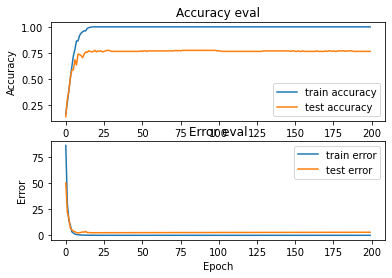

In [24]:
 plot_history(history)

In [20]:
filepath = r"C:\Users\Arth Banka\Desktop\Assignment 1\Audio_Classification-MLSP\NN_models\Neural Network Model 2"
new_model = tf.keras.models.load_model(
    filepath, custom_objects={'f1_':f1_, 'precision_':precision_, 'recall_':recall_}, compile=True, options=None
)
# Check its architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 51680)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              52921344  
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 53,611,658
Trainable params: 53,611,658


7/7 [==============================] - 0s 49ms/step - loss: 2.4613 - accuracy: 0.7650 - f1_: 0.7300 - precision_: 0.7469 - recall_: 0.7143
n Test_Accuracy:- 0.7649999856948853
7/7 [==============================] - 0s 38ms/step
confusion matrix
[[16  0  0  1  0  0  0  0  1  1]
 [ 0 18  0  0  2  0  0  0  2  0]
 [ 0  1 14  0  0  0  0  0  1  0]
 [ 1  0  0 10  0  1  2  0  0  4]
 [ 1  0  0  0 16  1  0  1  2  0]
 [ 0  0  0  1  1 16  0  0  0  0]
 [ 0  0  0  0  2  1 12  0  3  1]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 1  1  0  2  1  0  0  0 19  0]
 [ 0  1  0  3  1  2  3  1  0  9]]


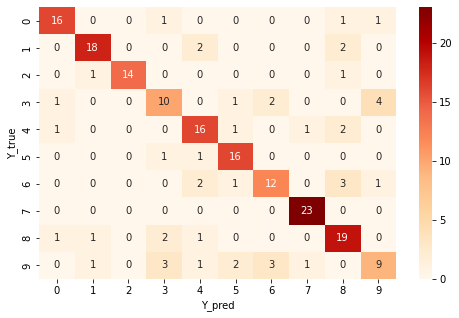

In [23]:
accuracy = new_model.evaluate(X_test, Y_test)
print('n', 'Test_Accuracy:-', accuracy[1])
pred=new_model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
#confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred),cmap="OrRd", annot=True, fmt=".0f", ax=ax)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()